In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

analyzer = SentimentIntensityAnalyzer()

def load_and_preprocess(filename):
    data = pd.read_csv(filename)
    data['compound'] = data['original_text'].apply(lambda text: analyzer.polarity_scores(str(text))['compound'])
    data['sentiment_type'] = data['compound'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))
    return data


In [2]:
def plot_sentiment_over_time(data, title_suffix=''):
    sentiment_by_date = data.groupby('created_at')['compound'].mean()
    plt.figure(figsize=(10, 5))
    plt.plot(sentiment_by_date.index, sentiment_by_date.values, marker='o', color='blue')
    plt.title(f'Sentiment Over Time {title_suffix}')
    plt.xlabel('Date')
    plt.ylabel('Average Compound Sentiment')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'sentiment_over_time_{title_suffix}.png')
    plt.show()



In [3]:
def plot_sentiment_distribution(data, title_suffix=''):
    sentiment_counts = data['sentiment_type'].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140,
            colors=['#4CAF50', '#FFC107', '#F44336'])
    plt.title(f'Sentiment Distribution {title_suffix}')
    plt.savefig(f'sentiment_distribution_{title_suffix}.png')
    plt.show()



In [4]:
def plot_average_sentiment_by_keyword(data, keywords, title_suffix=''):
    keyword_sentiments = {}
    for keyword in keywords:
        keyword_tweets = data[data['original_text'].str.contains(keyword, case=False, na=False)]
        keyword_sentiments[keyword] = keyword_tweets['compound'].mean()
    plt.figure(figsize=(8, 4))
    plt.bar(keyword_sentiments.keys(), keyword_sentiments.values(), color='skyblue')
    plt.title(f'Average Sentiment by Keyword {title_suffix}')
    plt.xlabel('Keyword')
    plt.ylabel('Average Compound Sentiment')
    plt.savefig(f'average_sentiment_by_keyword_{title_suffix}.png')
    plt.show()



In [5]:
def plot_monthly_sentiment_distribution(data, title_suffix=''):
    data['created_at'] = pd.to_datetime(data['created_at'])
    data['month'] = data['created_at'].dt.to_period('M')
    monthly_sentiment = data.groupby(['month', 'sentiment_type']).size().unstack().fillna(0)
    monthly_sentiment.plot(kind='bar', stacked=True, color=['#4CAF50', '#FFC107', '#F44336'], figsize=(10, 6))
    plt.title(f'Monthly Sentiment Distribution {title_suffix}')
    plt.xlabel('Month')
    plt.ylabel('Number of Tweets')
    plt.xticks(rotation=45)
    plt.legend(title='Sentiment Type')
    plt.tight_layout()
    plt.savefig(f'monthly_sentiment_distribution_{title_suffix}.png')
    plt.show()



In [6]:
def generate_word_cloud(data, sentiment_type, color, title_suffix=''):
    text = ' '.join(data[data['sentiment_type'] == sentiment_type]['original_text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - {sentiment_type.capitalize()} Tweets {title_suffix}')
    plt.savefig(f'word_cloud_{sentiment_type}_{title_suffix}.png')
    plt.show()



In [7]:
def analyze_file(filename, keywords):
    title_suffix = filename.split('.')[0]
    data = load_and_preprocess(filename)
    plot_sentiment_over_time(data, title_suffix=title_suffix)
    plot_sentiment_distribution(data, title_suffix=title_suffix)
    plot_average_sentiment_by_keyword(data, keywords, title_suffix=title_suffix)
    plot_monthly_sentiment_distribution(data, title_suffix=title_suffix)
    generate_word_cloud(data, 'positive', 'Greens', title_suffix=title_suffix)
    generate_word_cloud(data, 'neutral', 'Purples', title_suffix=title_suffix)
    generate_word_cloud(data, 'negative', 'Reds', title_suffix=title_suffix)



FileNotFoundError: [Errno 2] No such file or directory: '/Users/allydescoteaux/AI/COVID_19_TopicAnalysis/scripts/sentiment_over_time_/Users/allydescoteaux/AI/COVID_19_TopicAnalysis/data/2020_8_dataset_with_sentiment.png'

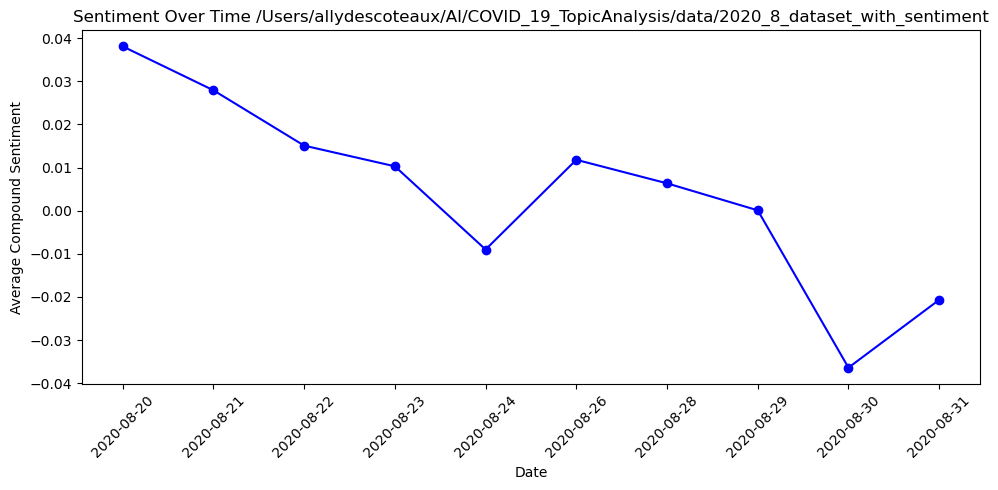

In [13]:
# Example usage with three files and keywords
files = ['/Users/allydescoteaux/AI/COVID_19_TopicAnalysis/data/2020_8_dataset_with_sentiment.csv', '/Users/allydescoteaux/AI/COVID_19_TopicAnalysis/data/2020_9_dataset_with_sentiment.csv', '/Users/allydescoteaux/AI/COVID_19_TopicAnalysis/data/2020_10_dataset_with_sentiment.csv']
keywords = ['health', 'vaccine', 'policy', 'lockdown']

for file in files:
    analyze_file(file, keywords)